# 필요모듈 import

In [ ]:
import numpy as np
import pandas as pd
import pickle
import io
import re

# 데이터 로드

In [ ]:
news_df = pd.read_csv("data/news_data.csv")

In [ ]:
news_df.head()

,date,content
0,2021-12-31 16:35:01,사업비 억 원 확보 강소도시로서 경쟁력 끌어올려안동시청안동시가 년 한 해 동안 개의...
1,2021-12-31 15:40:59,의왕시청 전경의왕뉴시스 박석희 기자 경기 의왕시가 심리상담치료 지원에 나선다 의왕...
2,2021-12-31 13:00:01,정동청 서울청정신건강의학과 원장 리스크 회피 불가능 인정해야 해법 발견 가능해정동청...
3,2021-12-31 11:56:23,보건복지부 장관 표창행정안전부 서비스 우수 자치단체 선정괄목 성과 뉴스대전뉴스 백운...
4,2021-12-31 11:43:24,기사내용 요약코로나 블루 극복 위한 웰니스 여행지 자연휴양림이용객 편의 맞춰 규제 ...


In [ ]:
blog_df = pd.read_csv("data/blog_data.csv")

In [ ]:
blog_df.head()

,date,content
0,2021-11,과목 정신간호학 프린트 필통 문제집 과학회 문제집
1,2021-11,식이조절 반응과 섭식장애 급식과 섭식장애의 종류 신경성 식욕부진증 잘못된 신체상과...
2,2021-11,짠테크를 한다고 이런 저런 글을 올리는 것을 읽어보면 내가 히는 것처럼 느껴지고 괜...
3,2021-11,볼쇼이 극장에르미타시 미술관브로드웨이리오의 예수상시드니 오페라 하우스는문화승리에 최...
4,2021-11,모든 코로나 확진자 특정사유 이외에 재택치료를 기본으로재택치료 중심의 의료대응체계 ...


# tokenization

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt

In [ ]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
def tokenizer(row):
    return hannanum.morphs(row)

In [ ]:
news_df['token'] = news_df['content'].apply(tokenizer)

In [ ]:
print('최대 토큰 개수:', (max(len(i) for i in news_df['token']))/len(news_df['token']))
print('평균 토큰 개수:', sum(map(len, news_df['token']))/len(news_df['token']))

최대 토큰 개수: 2.086266924564797
평균 토큰 개수: 827.5044487427466


In [ ]:
news_df

,date,content,token
0,2021-12-31 16:35:01,사업비 억 원 확보 강소도시로서 경쟁력 끌어올려안동시청안동시가 년 한 해 동안 개의...,"[사업비, 억, 원, 확보, 강소도시로서, 경쟁력, 끌어올려안동시청안동시, 가, 년..."
1,2021-12-31 15:40:59,의왕시청 전경의왕뉴시스 박석희 기자 경기 의왕시가 심리상담치료 지원에 나선다 의왕...,"[의왕시청, 전경의왕뉴시스, 박석희, 기, 이, 자, 경기, 의왕시, 가, 심리상담..."
2,2021-12-31 13:00:01,정동청 서울청정신건강의학과 원장 리스크 회피 불가능 인정해야 해법 발견 가능해정동청...,"[정동청, 서울청정신건강의학, 과, 원장, 리스크, 회피, 불가능, 인정, 하, 어..."
3,2021-12-31 11:56:23,보건복지부 장관 표창행정안전부 서비스 우수 자치단체 선정괄목 성과 뉴스대전뉴스 백운...,"[보건복지부, 장관, 표창행정안전부, 서비스, 우수, 자치단체, 선정괄목, 성, 과..."
4,2021-12-31 11:43:24,기사내용 요약코로나 블루 극복 위한 웰니스 여행지 자연휴양림이용객 편의 맞춰 규제 ...,"[기사내용, 요약코, 로나, 블루, 극복, 위하, ㄴ, 웰니스, 여행지, 자연휴양림..."
...,...,...,...
2580,2022-10-01 06:06:01,솔루션 저널리즘 현장을 가다 인터뷰 캐서린 롱 시애틀타임스 에듀케이션랩 에디터 철...,"[솔루션, 저널리즘, 현장, 을, 가, 아, 인터뷰, 크, 어서리ㄴ, 롱, 시애틀타..."
2581,2022-09-30 23:13:04,여명 참여 성료인제대학교 대학일자리플러스센터와 주관하고 김해시 김해고용플러스복지...,"[여명, 참여, 성료인제대학교, 대학일자리플러스센터, 와, 주관, 하고, 김해시, ..."
2582,2022-09-30 17:10:01,서울시정신건강복지센터가 년 정신건강 정책 심포지엄을 개최했다고 밝혔다사진서울시정신건...,"[서울시정신건강복지센터, 가, 년, 정신건강, 정책, 심포지엄, 을, 개최, 하, ..."
2583,2022-09-30 16:08:01,인제대학교총장 전민현 대학일자리플러스센터와 주관하고 김해시 김해고용플러스복지센터...,"[인제대학교총장, 전민현, 대학일자리플러스센터, 와, 주관, 하고, 김해시, 김해고..."


# news_data word embedding

In [ ]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
model = Word2Vec(sentences = news_df['token'], window = 5, min_count=0, workers =4, sg=1)

In [ ]:
model.wv.vectors.shape

(99463, 100)

In [ ]:
model_result=model.wv.most_similar('정신')
print(model_result)

[('건강', 0.8074697256088257), ('신체', 0.7959211468696594), ('산모들', 0.7773891091346741), ('신체정신', 0.775472104549408), ('수면', 0.7740621566772461), ('모성', 0.7722374200820923), ('건강상', 0.7651457190513611), ('호흡기계', 0.7591323256492615), ('육체', 0.7559041976928711), ('발달평가', 0.7549020648002625)]


# model 저장 및 로드

In [ ]:
model.wv.save_word2vec_format('news_w2v')
loaded_model = KeyedVectors.load_word2vec_format('news_w2v')

In [ ]:
!pip install gensim

In [ ]:
# 시각화를 위해 tensor file과 metadata file 저장
!python -m gensim.scripts.word2vec2tensor --input news_w2v --output news_w2v

2022-12-11 10:09:21,127 - word2vec2tensor - INFO - running D:\Anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input news_w2v --output news_w2v
2022-12-11 10:09:21,128 - keyedvectors - INFO - loading projection weights from news_w2v
2022-12-11 10:09:26,296 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (99463, 100) matrix of type float32 from news_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-12-11T10:09:26.276521', 'gensim': '4.2.0', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}
2022-12-11 10:09:31,691 - word2vec2tensor - INFO - 2D tensor file saved to news_w2v_tensor.tsv
2022-12-11 10:09:31,691 - word2vec2tensor - INFO - Tensor metadata file saved to news_w2v_metadata.tsv
2022-12-11 10:09:31,695 - word2vec2tensor - INFO - finished running word2vec2tensor.py


# blog+news data embedding

In [ ]:
blog_df['token']

0                 [과목, 정신간호학, 프린트, 피, ㄹ, 통, 문제집, 과학회, 문제집]
1        [식이조절, 반응, 과, 섭식장애, 급식, 과, 섭식장애, 의, 종류, 신경성, 식...
2        [짠테크, 를, 하, ㄴ다, 고, 이런, 저런, 글, 을, 올리, 는, 것, 을, ...
3        [볼쇼, 이, 극장에르미타시, 미술관브로드웨이리오, 의, 예수상시드, 이, 니, 오...
4        [모든, 코, 로나, 확진자, 특정사유, 이외, 에, 재택치료, 를, 기본으로재택치...
                               ...                        
28052    [연수구, 민둥산, 식재사업, 신구도, 이, 시ㅁ, 차별하나장지혜, 승, 이, ㄴ,...
28053    [이렇, 듯, 계속해서우울감, 을, 느끼, 어, 상담, 을, 희망하는청소년들은, 많...
28054    [또한가지, 의, 메리트는바, 로, 연봉인데요어떤, 일, 을, 하던연봉은, 누구에게...
28055    [사회적, 농업사회적, 경제, 는, 공동, 이익, 과, 사회적, 가치, 의, 실현,...
28056             [그룹, 하이텍, 분하, ㄹ, 포기, 정부, 정책소액주주, 반대, 영향]
Name: token, Length: 28057, dtype: object

In [ ]:
blog_df['token'] = blog_df['content'].apply(tokenizer)

concat을 통해 블로그 데이터와 뉴스데이터를 합하여 벡터공간에 임베딩

In [ ]:
df = pd.concat([blog_df, news_df], axis = 0)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
model = Word2Vec(sentences = df['token'], window = 5, min_count=0, workers =4, sg=1)

In [ ]:
model.wv.save_word2vec_format('df_w2v')
loaded_model = KeyedVectors.load_word2vec_format('df_w2v')

In [ ]:
# 시각화를 위해 tensor file과 metadata file 저장
!python -m gensim.scripts.word2vec2tensor --input df_w2v --output df_w2v

2022-12-11 14:02:20,325 - word2vec2tensor - INFO - running D:\Anaconda3\lib\site-packages\gensim\scripts\word2vec2tensor.py --input df_w2v --output df_w2v
2022-12-11 14:02:20,325 - keyedvectors - INFO - loading projection weights from df_w2v
2022-12-11 14:02:40,295 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (384283, 100) matrix of type float32 from df_w2v', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-12-11T14:02:40.274186', 'gensim': '4.2.0', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19045-SP0', 'event': 'load_word2vec_format'}
2022-12-11 14:03:00,783 - word2vec2tensor - INFO - 2D tensor file saved to df_w2v_tensor.tsv
2022-12-11 14:03:00,783 - word2vec2tensor - INFO - Tensor metadata file saved to df_w2v_metadata.tsv
2022-12-11 14:03:00,805 - word2vec2tensor - INFO - finished running word2vec2tensor.py


# word2vec 임베딩 결과와 키워드를 통한 정책수요 분석

In [ ]:
model.wv.most_similar(positive= ['정신건강', '정책'])

[('분절', 0.7615289688110352),
 ('출산장려', 0.7449356913566589),
 ('청소년복지정책', 0.7218450307846069),
 ('필요할까요민주주', 0.7215471267700195),
 ('제안대상', 0.7210079431533813),
 ('정신건강지표', 0.7158845663070679),
 ('사회적의학적', 0.7145999073982239),
 ('바우처사업', 0.7106062769889832),
 ('서울시아이윌센터', 0.7079378366470337),
 ('교육개방자', 0.7078312039375305)]

위의 코드는 ['정신건강' + '정책' = ?] 와 같은 수식으로 해석가능.

'정신건강'과 관련해 '정책'이라는 기울기와 거리만큼 떨어진 단어들을 더 높은 상관을 가진 순으로 도출함.

In [ ]:
model.wv.most_similar(positive= ['정신건강', '심각'])

[('정신건강상', 0.7623138427734375),
 ('건강', 0.737606406211853),
 ('정신적정신과적', 0.7350663542747498),
 ('말한대요외로움', 0.7330067157745361),
 ('높아정신건강', 0.726415753364563),
 ('노숙기간', 0.7208406925201416),
 ('된다더', 0.7176324129104614),
 ('심장호흡기', 0.7173416018486023),
 ('좋다어떤', 0.7147795557975769),
 ('된다보호종료아동자립준비청년', 0.7146962285041809)]

In [ ]:
model.wv.most_similar(positive= ['정신건강', '취약'])

[('정신건강년', 0.7444156408309937),
 ('건강', 0.7293729782104492),
 ('있다정신건강', 0.7261249423027039),
 ('의료서비스체계', 0.7246265411376953),
 ('심리정서', 0.7216724157333374),
 ('교육발전', 0.7216632962226868),
 ('심리적신체적', 0.7201128005981445),
 ('개입방식', 0.7197321653366089),
 ('도움추구행위', 0.7195080518722534),
 ('집단생활', 0.7187760472297668)]

In [ ]:
model.wv.most_similar(positive= ['정신건강', '정책', '우선'])

[('분절', 0.7835246920585632),
 ('출산장려', 0.7710160613059998),
 ('필요할까요민주주', 0.7610782980918884),
 ('시의적절한', 0.7567674517631531),
 ('건강영향평가', 0.7558363080024719),
 ('청소년복지정책', 0.7511515021324158),
 ('안전속', 0.7509476542472839),
 ('제안점', 0.7497159838676453),
 ('기획제안', 0.7475526928901672),
 ('점입니다도움', 0.7472109794616699)]

# word2vector 시각화

링크 : https://projector.tensorflow.org/

위에서 저장한 모델의 tensor, metadata를 이용하여 벡터의 시각화를 진행하였다.

In [ ]:
from IPython.display import Image

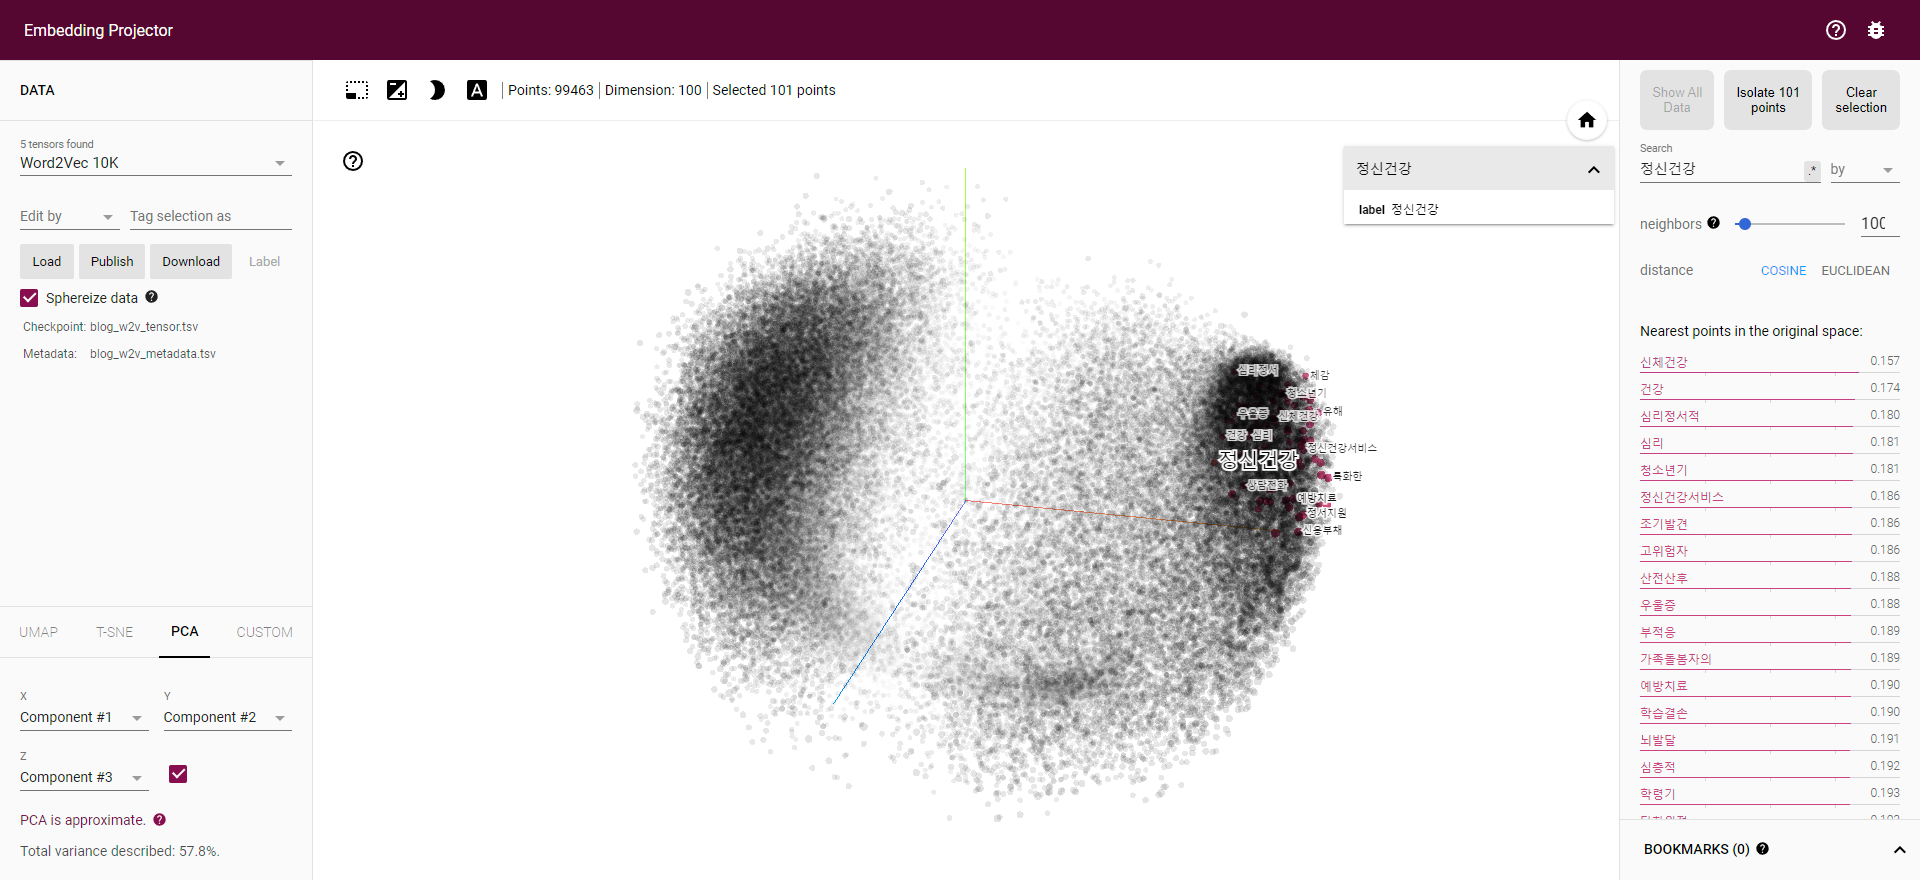

In [ ]:
Image('data/정신건강벡터.png')

PCA로 3차원 시각화된 모습

검색어는 정신건강

우측에 나열된 단어들은 '정신건강'과 가까운 거리에 있는 단어들을 나타낸다.

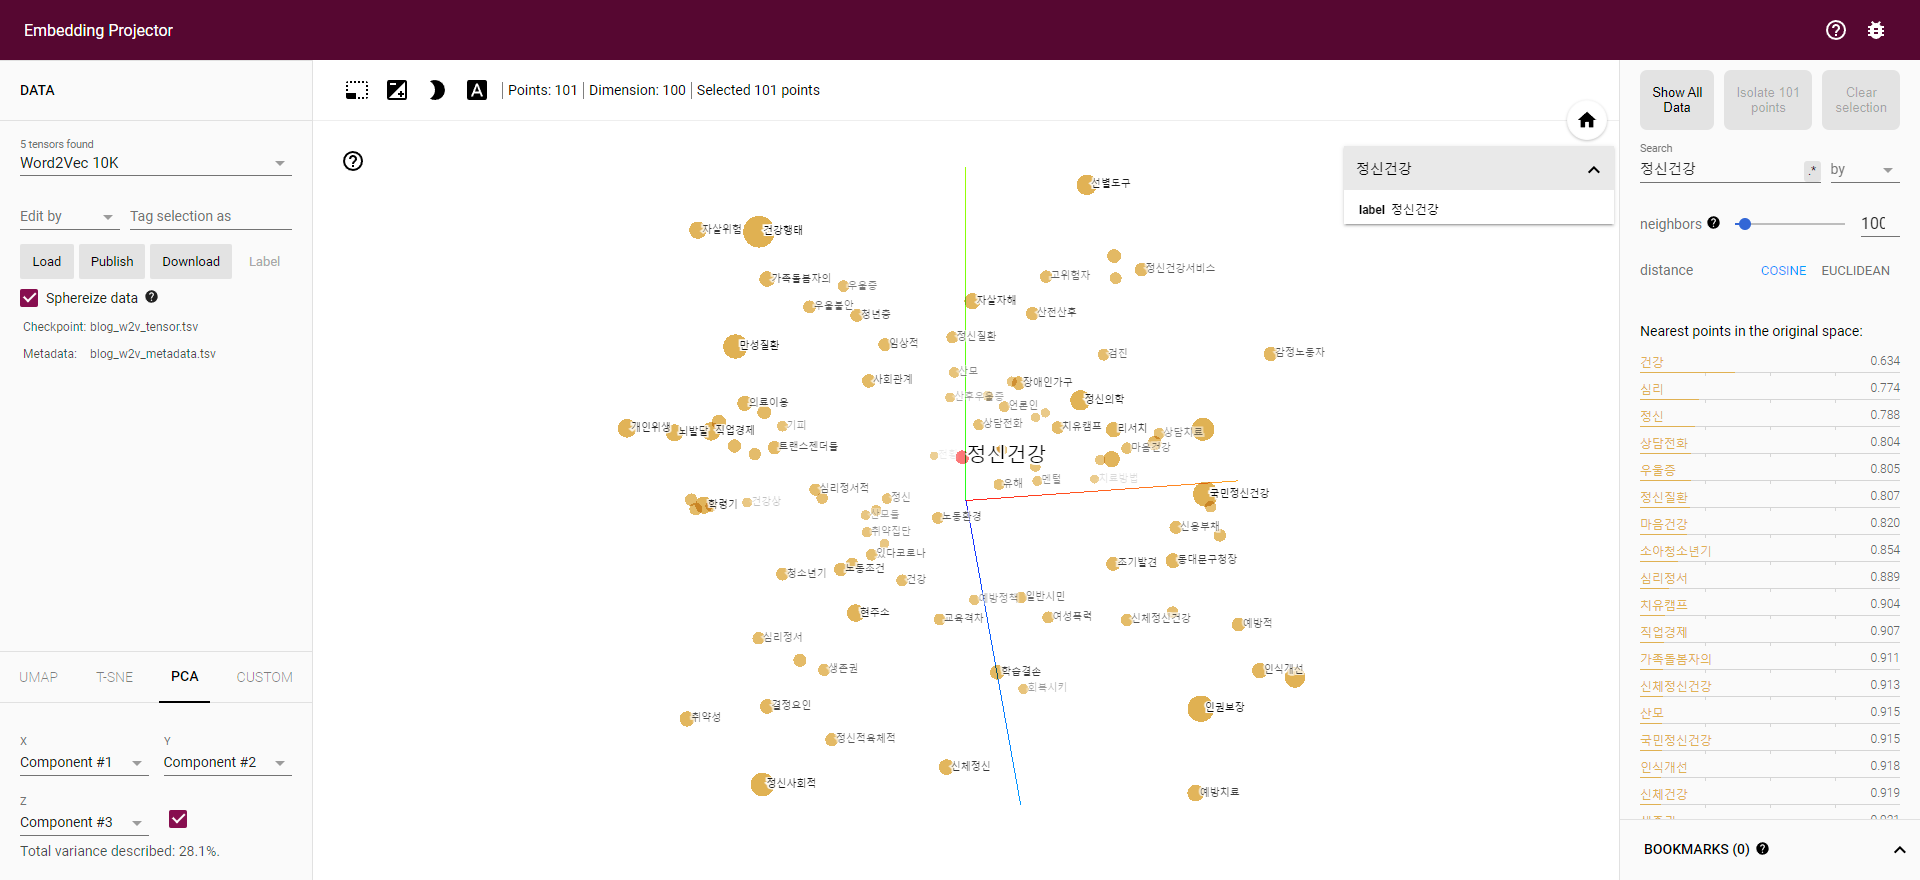

In [ ]:
Image('data/정신건강벡터2.png')

3차원 시각화 중 해당하는 단어(정신건강)와 가까운 거리에 있는 단어만 나타냄

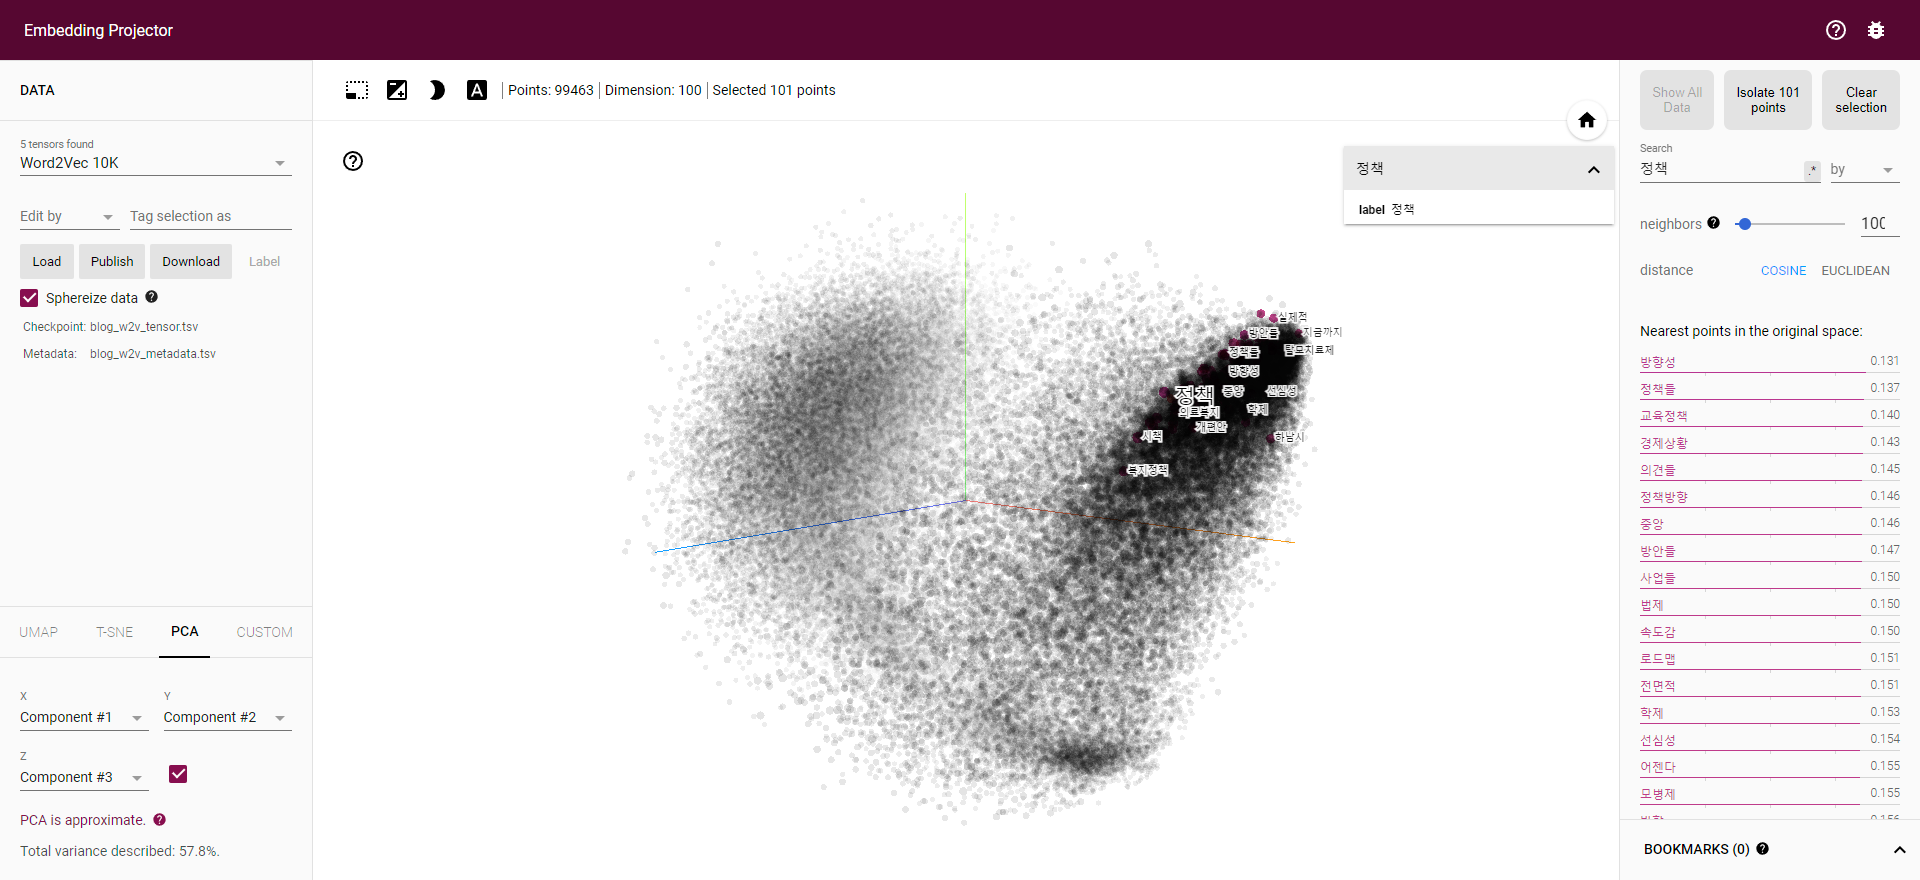

In [ ]:
Image('data/정책벡터.png')

검색어 정책

마찬가지로 우측에 나열된 단어들은 '정책'과 가까운 거리에 있는 단어들이다.

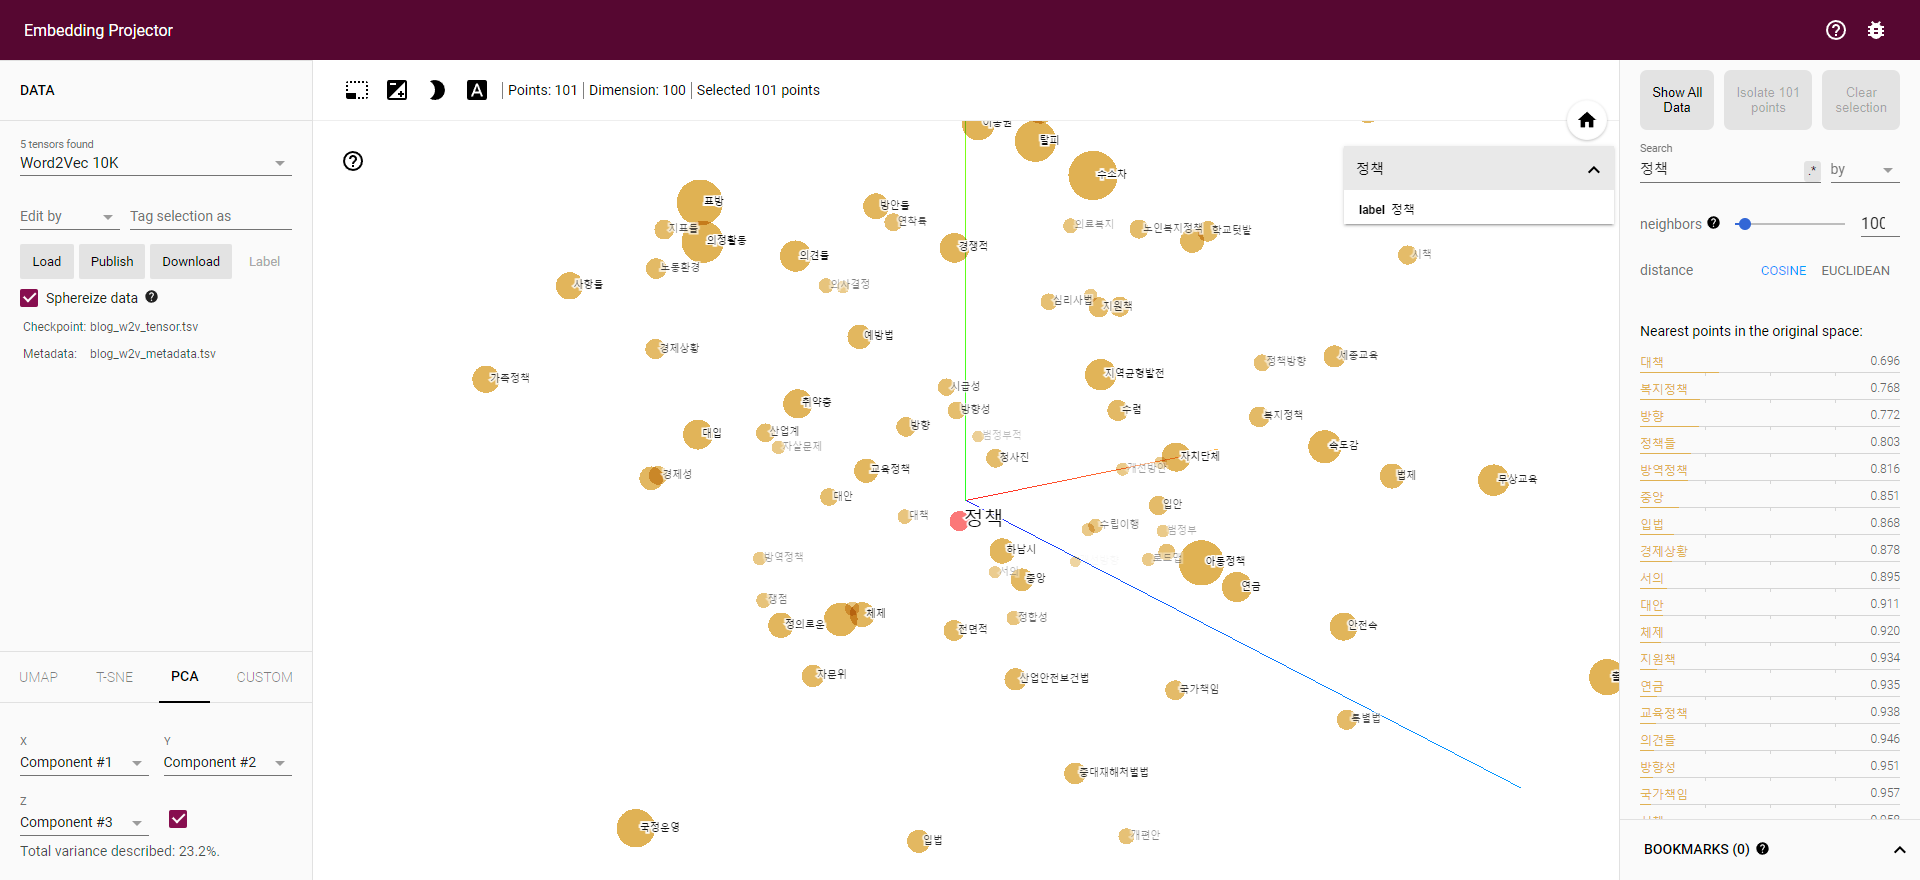

In [ ]:
Image('data/정책벡터2.png')

'정책'과 가까운 거리에 있는 단어들만 나타낸 모습